In [5]:
# data preprocessing
import pandas as pd
import numpy as np
import time
import os
import copy
import json
import shutil
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# machine learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import torchvision.transforms as transforms

# augmentation
import albumentations 
from albumentations.pytorch.transforms import ToTensorV2

In [ ]:
home_dir = os.getcwd()  
dataset_dir = "../../datasets/data21k/" 
output_dir = home_dir + "/processed_data"
categories = os.listdir(dataset_dir)

for split in ['train', 'val', 'test']:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)


In [13]:
data = []

for category in categories:
    # Get all images for the current category
    category_path = os.path.join(dataset_dir, category)
    images = os.listdir(category_path)

    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        data.extend([category] * num_images)  # Add category name for each image

    # Split into training and temp (80%-20%)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.2, random_state=42)
    # Split temp into validation and testing (50%-50% of temp)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    # Copy images to respective directories
    for img in train_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'train', category, img))
    for img in val_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'val', category, img))
    for img in test_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'test', category, img))

df = pd.DataFrame(data, columns=["Category"])


In [14]:
for split in ['train', 'val', 'test']:
   total = 0
   for category in categories:
      path = os.path.join(output_dir, split, category)
      count = len(os.listdir(path))
      total += count
      print(f"{split}/{category}: {count} images")
   print(f"Total {split}: {total} images\n ##############################")


train/CBB: 869 images
train/CBSD: 1751 images
train/CGM: 1908 images
train/CH: 2061 images
train/CMD: 10526 images
Total train: 17115 images
 ##############################
val/CBB: 109 images
val/CBSD: 219 images
val/CGM: 239 images
val/CH: 258 images
val/CMD: 1316 images
Total val: 2141 images
 ##############################
test/CBB: 109 images
test/CBSD: 219 images
test/CGM: 239 images
test/CH: 258 images
test/CMD: 1316 images
Total test: 2141 images
 ##############################


C:\Users\nicho\AppData\Local\Temp\ipykernel_16120\3467136209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Category", palette="viridis")


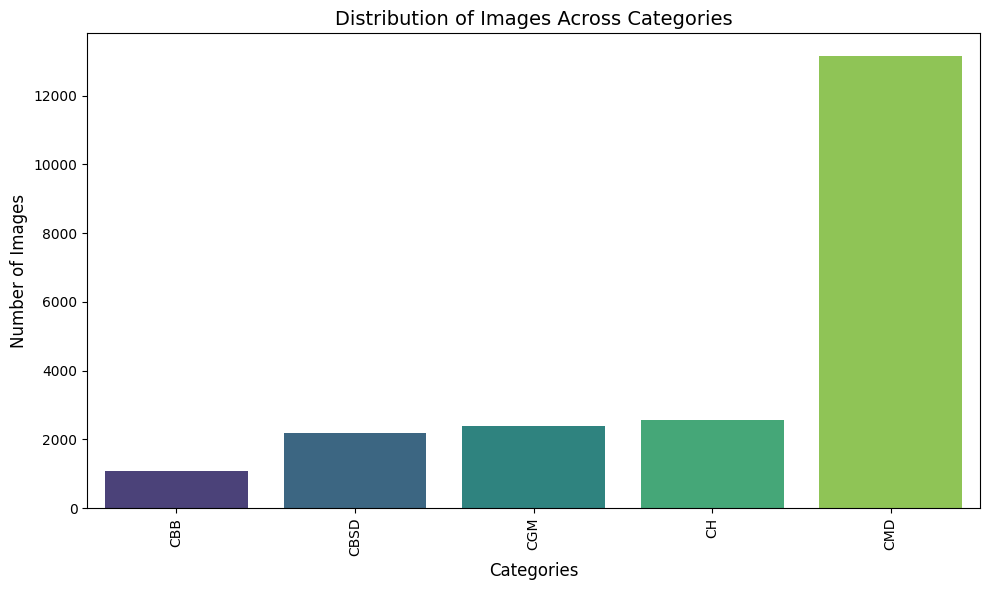

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Category", palette="viridis")
plt.xticks(rotation=90) 
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Distribution of Images Across Categories", fontsize=14)
plt.tight_layout()
plt.show()
